<a href="https://colab.research.google.com/github/qas95/Data-Analysis-Business-Intelligence/blob/main/BI_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [2]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf

In [3]:
init_notebook_mode(connected = True)
cf.go_offline()

In [4]:
df = pd.read_csv('coronavirus-disease-covid-19-statistics-and-research.csv', parse_dates=True)

In [5]:
df.head(2)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()

iso_code                      185
location                        0
date                            0
total_cases                     0
new_cases                       0
total_deaths                    0
new_deaths                      0
total_cases_per_million       286
new_cases_per_million         286
total_deaths_per_million      286
new_deaths_per_million        286
total_tests                 10642
new_tests                   11019
total_tests_per_thousand    10642
new_tests_per_thousand      11014
tests_units                 10642
dtype: int64

In [7]:
df.fillna(0, inplace = True)

In [8]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
#plt.scatter(df['location'], df['total_cases'])

In [10]:
loc_cases = df.groupby('location')['total_cases'].sum().sort_values(ascending = False).to_frame()

In [11]:
loc_cases.style.background_gradient(cmap = 'Blues')

,total_cases
location,
World,66513187
United States,18581764
China,6565374
Italy,5732331
Spain,5281954
Germany,4060205
France,3174150
United Kingdom,2837287
Iran,2592390


In [12]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
#let look at new cases statistics in countries

In [14]:
new_cases = df.groupby('location')['new_cases'].sum().sort_values(ascending = False).to_frame()

In [15]:
new_cases.style.background_gradient(cmap = 'Reds')

,new_cases
location,
World,3052370
United States,1012583
Spain,210773
Italy,201505
United Kingdom,161145
Germany,157641
France,126835
Turkey,114653
Russia,93558


In [16]:
#cases w.r.t to deaths

In [17]:
cases_tests = df.groupby('location')['total_cases', 'total_deaths'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [18]:
cases_tests

,total_cases,total_deaths
location,,
Afghanistan,23749,751
Albania,16332,761
Algeria,66423,8599
Andorra,20456,870
Angola,588,62
...,...,...
Western Sahara,24,0
World,66513187,4143642
Yemen,20,0


Text(0, 0.5, 'Cases')

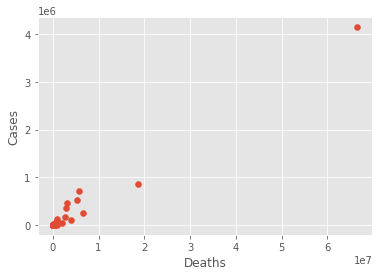

In [19]:
plt.scatter(cases_tests['total_cases'], cases_tests['total_deaths'])
plt.xlabel('Deaths')
plt.ylabel('Cases')

In [20]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0


#### lets look at the tests per cases in most affected countries like America, Spain etc

In [21]:
america = df[df['location'] == 'United States']

In [37]:
america.iplot(kind = 'scatter', x = 'total_cases', y = 'total_tests', xTitle='Cases', yTitle='Tests', title = 'Cases/tests in America', mode = 'lines+markers', colors = 'blue')

In [23]:
#deaths toll
america.iplot(kind = 'scatter', x = 'total_cases', y = 'total_deaths', mode = 'lines+markers', colors = 'red', title = 'Deaths in US', xTitle='Cases', yTitle='Deaths')

In [24]:
px.bar(america, x = 'date', y ='total_cases', color = 'total_cases', title = 'Rise of cases over time in America')

## Spain

In [25]:
spain = df[df['location'] == 'Spain']

In [26]:
#This data is faulty

spain.iplot(kind = 'scatter', x = 'total_cases', y = 'total_tests', mode = 'lines+markers', title = 'Cases/Tests in Spain', xTitle='Cases', yTitle='Tests', colors = 'blue')

In [27]:
spain.iplot(kind = 'scatter', x = 'total_cases', y = 'total_deaths', mode = 'lines+markers', title = 'Cases/Tests in Spain', xTitle='Cases', yTitle='Deaths', colors = 'red')

In [28]:
px.bar(spain, x = 'date', y ='total_cases', color = 'total_cases', title = 'Rise of cases over time in Spain')


## Worldwide analysis

In [29]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
cases = df.groupby('date')['total_cases'].sum().to_frame().reset_index()

In [31]:
deaths = df.groupby('date')['total_deaths'].sum().to_frame().reset_index()

In [32]:
fig = go.Figure()
fig.update_layout(title = 'Worlwide deaths and cases')
fig.add_trace(go.Scatter(x = cases['date'], y = cases['total_cases'], name = 'Cases', mode = 'lines+markers', line = dict(color = 'blue')))
fig.add_trace(go.Scatter(x = deaths['date'], y = deaths['total_deaths'], name = 'Deaths', mode = 'lines+markers', line = dict(color = 'red')))

In [33]:
df1 = df[(df['location'] != 'World') & (df['total_cases']>20000)]

In [34]:
df1

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
1126,BEL,Belgium,2020-04-07,20814,1123,1632,185,1795.918,96.897,140.816,15.963,90126.0,5857.0,7.776,0.505,tests performed
1127,BEL,Belgium,2020-04-08,22194,1380,2035,403,1914.990,119.072,175.588,34.773,96283.0,6157.0,8.308,0.531,tests performed
1128,BEL,Belgium,2020-04-09,23403,1209,2240,205,2019.308,104.318,193.276,17.688,102418.0,6135.0,8.837,0.529,tests performed
1129,BEL,Belgium,2020-04-10,24983,1580,2523,283,2155.637,136.329,217.695,24.418,108871.0,6453.0,9.394,0.557,tests performed
1130,BEL,Belgium,2020-04-11,26667,1684,3019,496,2300.939,145.302,260.492,42.797,115246.0,6375.0,9.944,0.550,tests performed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13369,USA,United States,2020-04-25,890524,21352,51017,1054,2690.383,64.507,154.129,3.184,5196649.0,271256.0,15.700,0.819,inconsistent units (COVID Tracking Project)
13370,USA,United States,2020-04-26,939053,48529,53189,2172,2836.995,146.612,160.691,6.562,5403052.0,206403.0,16.323,0.624,inconsistent units (COVID Tracking Project)
13371,USA,United States,2020-04-27,965910,26857,54876,1687,2918.134,81.138,165.787,5.097,5593495.0,190443.0,16.899,0.575,inconsistent units (COVID Tracking Project)
13372,USA,United States,2020-04-28,988451,22541,56245,1369,2986.233,68.099,169.923,4.136,0.0,0.0,0.000,0.000,0


In [35]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df1['location'], y = df1['total_cases'], width = 0.5))
fig.update_layout(title='Countries with more than 20k cases')